In [46]:
import numpy as np
import random
def play_games(policy_1, policy_2, env, num_games):
    scores = {policy_1: 0, policy_2: 0}
    total_rewards = {policy_1: 0, policy_2: 0}
    
    round_rewards = []
    

    for i in range(num_games):

        # randomly assing the first player
        if random.randint(0, 1) == 0:
            policy_assignment = {env.possible_agents[0]: policy_1, env.possible_agents[1]: policy_2}
        else:
            policy_assignment = {env.possible_agents[0]: policy_2, env.possible_agents[1]: policy_1}

        rewards = {agent: 0 for agent in env.possible_agents}
        env.reset()

        for agent in env.agent_iter():
            obs, reward, termination, truncation, info = env.last()

            # Separate observation and action mask
            observation, action_mask = obs.values()

            for a in env.agents:
                rewards[a] += env.rewards[a]             
            if termination or truncation:
                winner = max(env.rewards, key=env.rewards.get)
                winner = policy_assignment[winner]
                scores[winner] += 1 # only tracks the largest reward (winner of game)
                for a in env.possible_agents:
                    total_rewards[policy_assignment[a]] += rewards[a]
                break
            else:
                act = policy_assignment[agent].compute_single_action(obs, action_mask)[0]

            env.step(act)
    env.close()
    print("Scores: ", scores)
    print("Total rewards: ", total_rewards)
    return scores, total_rewards

In [ ]:
import coup_v2
from ray.rllib.algorithms.algorithm import Algorithm
from ray.rllib.env.wrappers.pettingzoo_env import PettingZooEnv
from ray.tune.registry import register_env, register_input
from ray.rllib.models import ModelCatalog
from ray.rllib.examples.models.action_mask_model import TorchActionMaskModel as ActionMaskModel
from models import ActionMaskCentralisedCritic
import ray
from utils import get_experiment_folders, get_checkpoints_folder, get_sorted_checkpoints
import argparse
import pandas as pd
import os


In [ ]:
import coup_v2

In [ ]:

def env_creator():

    env = coup_v2.env()
    return env

In [ ]:
policies

In [ ]:
import utils
ray.shutdown()
ray.init(local_mode=True)
ModelCatalog.register_custom_model("am_model", ActionMaskModel)
register_env("Coup", lambda config: PettingZooEnv(env_creator()))

policies = []


main_folder = os.path.abspath("./ray_results/PPO_decentralised/test_1")

model_paths = get_experiment_folders(main_folder)



for model_path in model_paths:
    print(model_path)
    path = get_sorted_checkpoints(get_checkpoints_folder(model_path))[-1]
    policies.append(Algorithm.from_checkpoint(path).get_policy(policy_id="policy"))
    

main_folder = os.path.abspath("./ray_results/PPO_decentralised/test_2")

model_paths = get_experiment_folders(main_folder)

for model_path in model_paths:
    print(model_path)
    path = get_sorted_checkpoints(get_checkpoints_folder(model_path))[-1]
    policies.append(Algorithm.from_checkpoint(path).get_policy(policy_id="policy"))

In [170]:
get_experiment_folders(main_folder)

main_folder_1, main_folder_2 = os.path.abspath("./ray_results/PPO_decentralised/test_1"), os.path.abspath("./ray_results/PPO_decentralised/test_2")

model_paths = get_experiment_folders(main_folder_1) + get_experiment_folders(main_folder_2)
model_paths

['d:\\Documents\\Coup-RL\\Coup\\coup\\ray_results\\PPO_decentralised\\test_1\\PPO_Coup_1bd85_00000_0_clip_param-0.1000-gamma-0.9000-train_batch_size-10000_2024-04-21_20-26-53',
 'd:\\Documents\\Coup-RL\\Coup\\coup\\ray_results\\PPO_decentralised\\test_1\\PPO_Coup_1bd85_00001_1_clip_param-0.2000-gamma-0.9000-train_batch_size-10000_2024-04-21_20-50-44',
 'd:\\Documents\\Coup-RL\\Coup\\coup\\ray_results\\PPO_decentralised\\test_1\\PPO_Coup_1bd85_00002_2_clip_param-0.3000-gamma-0.9000-train_batch_size-10000_2024-04-21_21-28-22',
 'd:\\Documents\\Coup-RL\\Coup\\coup\\ray_results\\PPO_decentralised\\test_1\\PPO_Coup_1bd85_00003_3_clip_param-0.1000-gamma-0.9500-train_batch_size-10000_2024-04-21_21-54-16',
 'd:\\Documents\\Coup-RL\\Coup\\coup\\ray_results\\PPO_decentralised\\test_1\\PPO_Coup_1bd85_00004_4_clip_param-0.2000-gamma-0.9500-train_batch_size-10000_2024-04-21_22-20-05',
 'd:\\Documents\\Coup-RL\\Coup\\coup\\ray_results\\PPO_decentralised\\test_1\\PPO_Coup_1bd85_00005_5_clip_param-0.3

In [48]:
import os
os.environ["PYTHONWARNINGS"] = "ignore::DeprecationWarning"
scores_df = pd.DataFrame(columns=["policy_1", "policy_2", "win_rate", "total_rewards"])

for i in range(len(policies)):
    for j in range(i+1, len(policies)):
        print("Playing games between policies: ", i, j)
        
        temp_scores, temp_total_rewards = play_games(policies[i], policies[j], env_creator(), 100)
        scores_df = pd.concat([scores_df, pd.DataFrame({"policy_1": [i], "policy_2": [j], "win_rate": [temp_scores[policies[i]]/100], "total_rewards": [temp_total_rewards[policies[i]]]})])

Playing games between policies:  0 1
Scores:  {PPOTorchPolicy: 52, PPOTorchPolicy: 48}
Total rewards:  {PPOTorchPolicy: 8, PPOTorchPolicy: -8}
Playing games between policies:  0 2


C:\Users\Test\AppData\Local\Temp\ipykernel_26396\3078252138.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  scores_df = pd.concat([scores_df, pd.DataFrame({"policy_1": [i], "policy_2": [j], "win_rate": [temp_scores[policies[i]]/100], "total_rewards": [temp_total_rewards[policies[i]]]})])


Scores:  {PPOTorchPolicy: 48, PPOTorchPolicy: 52}
Total rewards:  {PPOTorchPolicy: -4, PPOTorchPolicy: 4}
Playing games between policies:  0 3
Scores:  {PPOTorchPolicy: 45, PPOTorchPolicy: 55}
Total rewards:  {PPOTorchPolicy: -10, PPOTorchPolicy: 10}
Playing games between policies:  0 4
Scores:  {PPOTorchPolicy: 48, PPOTorchPolicy: 52}
Total rewards:  {PPOTorchPolicy: 0, PPOTorchPolicy: 0}
Playing games between policies:  0 5
Scores:  {PPOTorchPolicy: 46, PPOTorchPolicy: 54}
Total rewards:  {PPOTorchPolicy: -14, PPOTorchPolicy: 14}
Playing games between policies:  0 6
Scores:  {PPOTorchPolicy: 44, PPOTorchPolicy: 56}
Total rewards:  {PPOTorchPolicy: -20, PPOTorchPolicy: 20}
Playing games between policies:  0 7
Scores:  {PPOTorchPolicy: 44, PPOTorchPolicy: 56}
Total rewards:  {PPOTorchPolicy: -19, PPOTorchPolicy: 19}
Playing games between policies:  0 8
Scores:  {PPOTorchPolicy: 47, PPOTorchPolicy: 53}
Total rewards:  {PPOTorchPolicy: -6, PPOTorchPolicy: 6}
Playing games between policie

In [111]:
scores_df

,policy_1,policy_2,win_rate,total_rewards,policy_1_wins,policy_2_wins
0,0,1,0.52,8,1,0
0,0,2,0.48,-4,0,1
0,0,3,0.45,-10,0,1
0,0,4,0.48,0,0,1
0,0,5,0.46,-14,0,1
...,...,...,...,...,...,...
0,14,16,0.64,40,1,0
0,14,17,0.50,-2,0,0
0,15,16,0.50,3,0,0
0,15,17,0.47,-9,0,1


In [164]:
# produce heatmap of wins
import seaborn as sns
import matplotlib.pyplot as plt




scores_heatmap = scores_df.pivot(index="policy_1", columns="policy_2", values="win_rate")
# duplicate the scores to fill the whole matrix

scores_heatmap.insert(0, 0, np.nan)
# # insert 17 row
scores_heatmap.loc[17] = np.nan
#scores_heatmap.fillna(0, inplace=True)

for i in scores_heatmap.index:
    for j in scores_heatmap.columns:
        if pd.isna(scores_heatmap.at[i, j]):
            
            scores_heatmap.at[i, j] = 1 - scores_heatmap.at[j, i]

scores_heatmap
#scores_heatmap.fillna(0, inplace=True)
scores_heatmap

policy_2,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
policy_1,,,,,,,,,,,,,,,,,,
0,NaN,0.52,0.48,0.45,0.48,0.46,0.44,0.44,0.47,0.41,0.42,0.36,0.40,0.39,0.42,0.40,0.40,0.38
1,0.48,NaN,0.52,0.58,0.50,0.50,0.44,0.48,0.52,0.50,0.51,0.55,0.36,0.44,0.44,0.44,0.51,0.57
2,0.52,0.48,NaN,0.60,0.44,0.51,0.47,0.36,0.40,0.35,0.44,0.39,0.35,0.47,0.38,0.45,0.42,0.42
3,0.55,0.42,0.40,NaN,0.47,0.55,0.49,0.47,0.43,0.38,0.36,0.43,0.40,0.37,0.41,0.38,0.51,0.47
4,0.52,0.50,0.56,0.53,NaN,0.50,0.47,0.55,0.45,0.50,0.50,0.49,0.35,0.38,0.47,0.46,0.50,0.46
5,0.54,0.50,0.49,0.45,0.50,NaN,0.47,0.54,0.50,0.46,0.44,0.39,0.50,0.36,0.42,0.44,0.49,0.47
6,0.56,0.56,0.53,0.51,0.53,0.53,NaN,0.51,0.55,0.45,0.47,0.48,0.44,0.56,0.44,0.45,0.49,0.39
7,0.56,0.52,0.64,0.53,0.45,0.46,0.49,NaN,0.52,0.42,0.57,0.53,0.44,0.37,0.49,0.56,0.47,0.41
8,0.53,0.48,0.60,0.57,0.55,0.50,0.45,0.48,NaN,0.50,0.56,0.47,0.52,0.47,0.42,0.54,0.47,0.44


In [157]:
scores_heatmap.index
scores_heatmap.at[0,1]

0.52

In [113]:
scores_heatmap["policy_2"]

KeyError: 'policy_2'

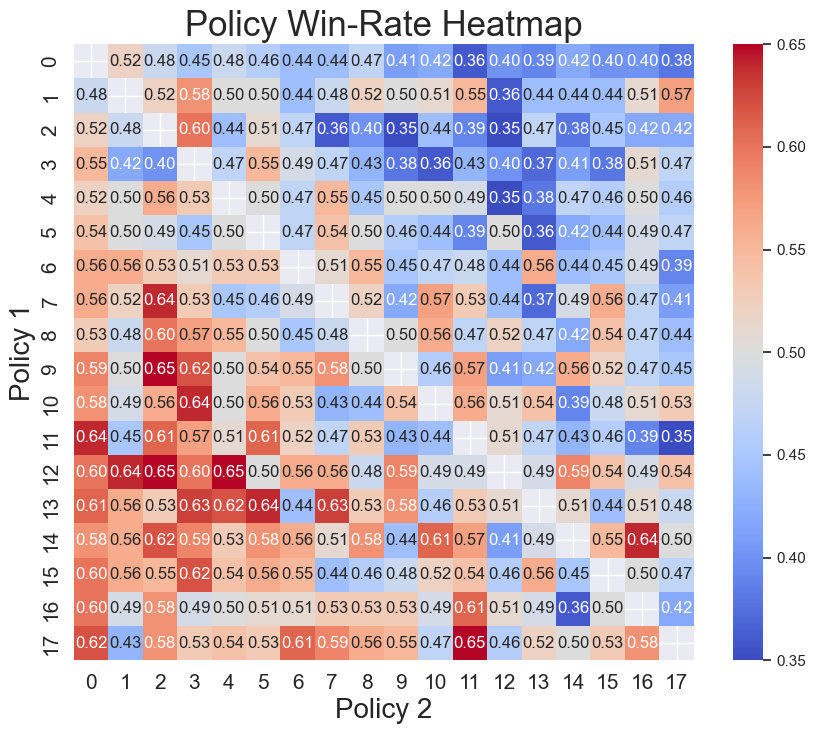

In [204]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
# set colour midpoint as 0.5


# increases the font size

sns.heatmap(scores_heatmap, annot=True, cmap='coolwarm', fmt=".2f", center=0.5)
plt.title("Policy Win-Rate Heatmap", fontsize=25)


plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# increase axis labels
plt.xlabel("Policy 2", fontsize=20)
plt.ylabel("Policy 1", fontsize=20)

# save the figure to a pdf
plt.savefig("policy_win_rate_heatmap", format='pdf', bbox_inches='tight')

plt.show()

In [185]:
# calculate the number of wins for each policy. This is the number of times the winrate is above 0.5, when "policy_1" and the number of times below 0.5 when "policy_2"
scores_df["policy_1_wins"] = scores_df.apply(lambda x: 1 if x["win_rate"] > 0.5 else 0, axis=1)
scores_df["policy_2_wins"] = scores_df.apply(lambda x: 1 if x["win_rate"] < 0.5 else 0, axis=1)



wins_df_1 = scores_df.groupby("policy_1").agg({"policy_1_wins": "sum"}).reset_index()
wins_df_2 = scores_df.groupby("policy_2").agg({"policy_2_wins": "sum"}).reset_index()


wins = pd.merge(wins_df_1, wins_df_2, how="outer", left_on="policy_1", right_on="policy_2")
wins.fillna(0, inplace=True)
wins["total_wins"] = wins["policy_1_wins"] + wins["policy_2_wins"]

# sort by total wins
wins = wins.sort_values("total_wins", ascending=False)
wins

,policy_1,policy_1_wins,policy_2,policy_2_wins,total_wins
17,0.0,0.0,17.0,13.0,13.0
14,14.0,2.0,14.0,11.0,13.0
13,13.0,2.0,13.0,11.0,13.0
10,10.0,5.0,10.0,6.0,11.0
12,12.0,3.0,12.0,8.0,11.0
15,15.0,0.0,15.0,10.0,10.0
16,16.0,0.0,16.0,9.0,9.0
9,9.0,3.0,9.0,6.0,9.0
6,6.0,3.0,6.0,6.0,9.0
7,7.0,4.0,7.0,4.0,8.0


In [205]:
print(model_paths[17])
print(model_paths[14])
print(model_paths[13])
#print(model_paths[12])

d:\Documents\Coup-RL\Coup\coup\ray_results\PPO_decentralised\test_2\PPO_Coup_8d620_00008_8_clip_param-0.3000-entropy_coeff-0.0001-gamma-0.9500_2024-04-23_03-24-32
d:\Documents\Coup-RL\Coup\coup\ray_results\PPO_decentralised\test_2\PPO_Coup_8d620_00005_5_clip_param-0.3000-entropy_coeff-0.0010-gamma-0.9500_2024-04-23_01-01-54
d:\Documents\Coup-RL\Coup\coup\ray_results\PPO_decentralised\test_2\PPO_Coup_8d620_00004_4_clip_param-0.2000-entropy_coeff-0.0010-gamma-0.9500_2024-04-23_00-13-31


In [178]:
wins_df_1

,policy_1,policy_1_wins
0,0,1
1,1,7
2,2,2
3,3,2
4,4,1
5,5,1
6,6,3
7,7,4
8,8,3
9,9,3


In [58]:
scores_df.to_csv("scores_df.csv")

In [ ]:
print("hello")

In [ ]:
main_folder

In [ ]:
#from utils import get_last_agent_path
print(model_paths)

#Algorithm.from_checkpoint(model_paths[-6]).get_policy(policy_id="policy")
#model_paths[-30]
ModelCatalog.register_custom_model("am_model", ActionMaskModel)
Algorithm.from_checkpoint(max(model_paths, key=os.path.getmtime)).get_policy(policy_id="policy")

In [ ]:
Algorithm.from_checkpoint("./ray_results/PPO_decentralised/PPO_decentralised_0_2021-08-02_14-00-00q1v1q1v1/checkpoint_000001/checkpoint-1").get_policy(policy_id="policy")